<a href="https://colab.research.google.com/github/ErtanOz/isochrome_cyclingincologne/blob/main/Isochrome_CyclingInCologne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.1
    Uninstalling networkx-3.4.1:
      Successfully uninstalled networkx-3.4.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [ ]:
import mpld3

Number of intersections:  78351
Number of road segments: 189516


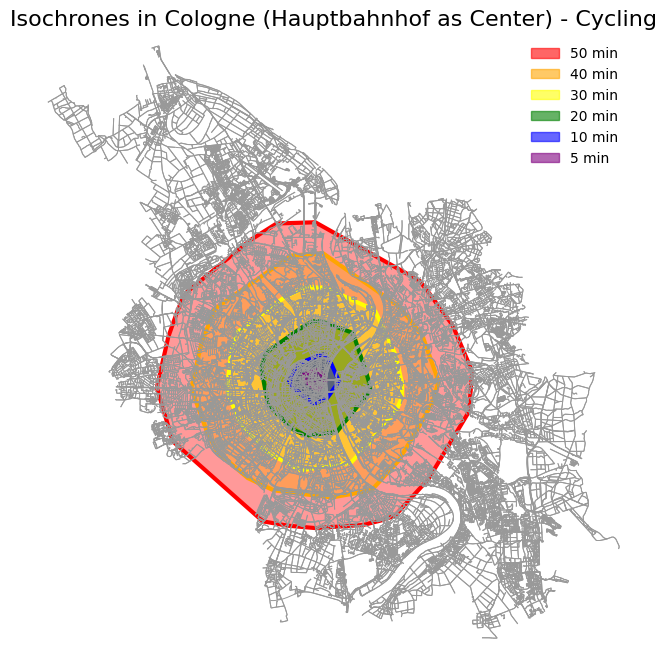

In [ ]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for bike routes)
G = ox.graph_from_polygon(admin_poly, network_type='bike')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the cycling speed (10 km/h -> 2.78 m/s)
cycling_speed = 2.78  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / cycling_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append(gpd.GeoSeries([polygon]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Plot the isochrones
for idx, (polygon, time) in enumerate(reversed(list(zip(isochrone_polys, isochrone_times)))):
    polygon.plot(ax=ax, color=colors[idx], alpha=0.4, label=f'{time} min')
    polygon.plot(ax=ax, color='none', edgecolor=colors[idx], linewidth=3)

# Manually create legend handles
handles = [mpatches.Patch(color=colors[idx], alpha=0.6, label=f'{time} min') for idx, time in enumerate(reversed(isochrone_times))]

# Plot the network
ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.7, show=False)

# Add the legend to the plot and set the title
ax.set_title('Isochrones in Cologne (Hauptbahnhof as Center) - Cycling', fontsize=16)
legend = plt.legend(handles=handles)
legend.get_frame().set_linewidth(0)  # Remove the legend box's frame

# Show the plot
plt.show()


In [ ]:
try:
    !pip install mpld3 --user
except:
    !conda install -c conda-forge mpld3 -y
    #or download and install manually
    #!wget https://files.pythonhosted.org/packages/91/95/a52d3a83d0a29ba0d6898f6727e9858fe0a43f6df3f0c5d2d0d2e9d17e3f/mpld3-0.5.8-py3-none-any.whl
    #!pip install mpld3-0.5.8-py3-none-any.whl

Number of intersections:  78351
Number of road segments: 189516


/usr/local/lib/python3.10/dist-packages/mpld3/mplexporter/utils.py:361: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


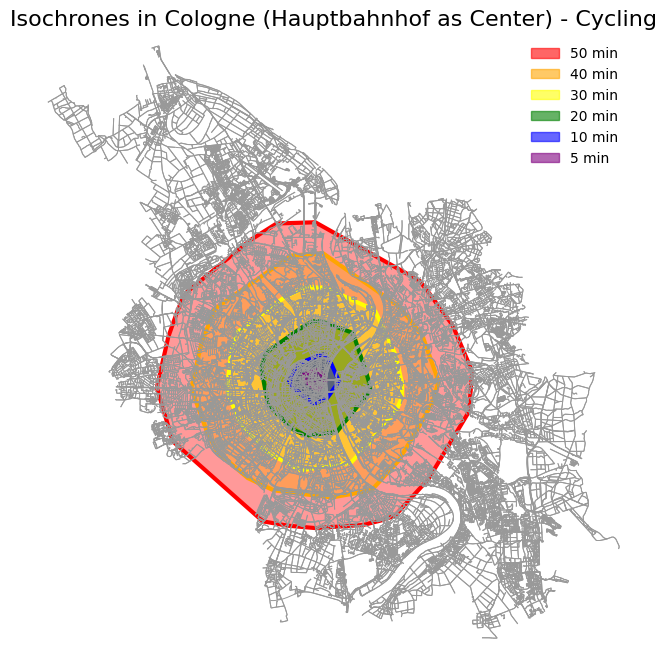

In [ ]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mpld3

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for bike routes)
G = ox.graph_from_polygon(admin_poly, network_type='bike')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the cycling speed (10 km/h -> 2.78 m/s)
cycling_speed = 2.78  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / cycling_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append(gpd.GeoSeries([polygon]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Plot the isochrones
for idx, (polygon, time) in enumerate(reversed(list(zip(isochrone_polys, isochrone_times)))):
    polygon.plot(ax=ax, color=colors[idx], alpha=0.4, label=f'{time} min')
    polygon.plot(ax=ax, color='none', edgecolor=colors[idx], linewidth=3)

# Manually create legend handles
handles = [mpatches.Patch(color=colors[idx], alpha=0.6, label=f'{time} min') for idx, time in enumerate(reversed(isochrone_times))]

# Plot the network
ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.7, show=False)

# Add the legend to the plot and set the title
ax.set_title('Isochrones in Cologne (Hauptbahnhof as Center) - Cycling', fontsize=16)
legend = plt.legend(handles=handles)
legend.get_frame().set_linewidth(0)  # Remove the legend box's frame

# Export the plot to HTML
html_str = mpld3.fig_to_html(fig)
with open("isochrones_cologne.html", "w") as f:
    f.write(html_str)

# Show the plot
plt.show()


Number of intersections:  78351
Number of road segments: 189516


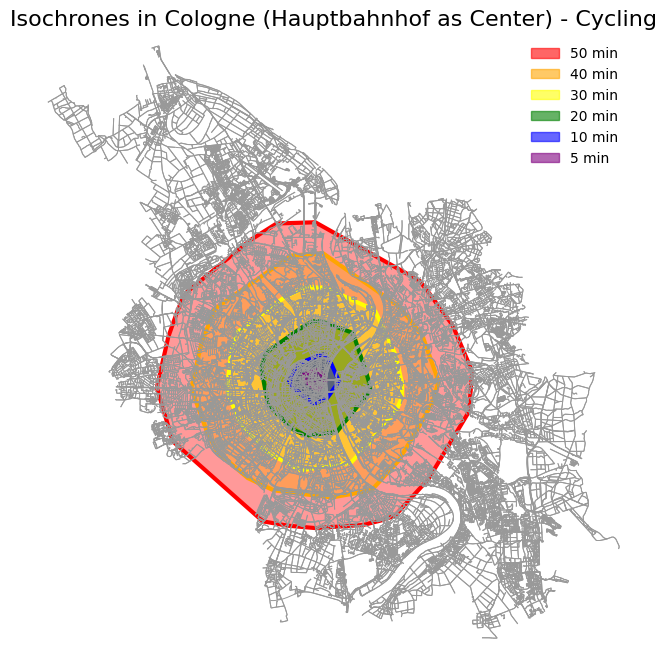

In [ ]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for bike routes)
G = ox.graph_from_polygon(admin_poly, network_type='bike')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the cycling speed (10 km/h -> 2.78 m/s)
cycling_speed = 2.78  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / cycling_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append(gpd.GeoSeries([polygon]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Plot the isochrones
for idx, (polygon, time) in enumerate(reversed(list(zip(isochrone_polys, isochrone_times)))):
    polygon.plot(ax=ax, color=colors[idx], alpha=0.4, label=f'{time} min')
    polygon.plot(ax=ax, color='none', edgecolor=colors[idx], linewidth=3)

# Manually create legend handles
handles = [mpatches.Patch(color=colors[idx], alpha=0.6, label=f'{time} min') for idx, time in enumerate(reversed(isochrone_times))]

# Plot the network
ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.7, show=False)

# Add the legend to the plot and set the title
ax.set_title('Isochrones in Cologne (Hauptbahnhof as Center) - Cycling', fontsize=16)
legend = plt.legend(handles=handles)
legend.get_frame().set_linewidth(0)  # Remove the legend box's frame

# Save the plot as an HTML file
plt.savefig('isochrones_cologne.png', format='png')
html_str = f"<html><body><h1>Isochrones in Cologne (Hauptbahnhof as Center) - Cycling</h1><img src='isochrones_cologne.png' alt='Isochrones in Cologne'></body></html>"
with open("isochrones_cologne.html", "w") as f:
    f.write(html_str)

# Show the plot
plt.show()


In [ ]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for bike routes)
G = ox.graph_from_polygon(admin_poly, network_type='bike')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the cycling speed (10 km/h -> 2.78 m/s)
cycling_speed = 2.78  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / cycling_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append((polygon, time))

# Create a folium map centered at Cologne Hauptbahnhof
m = folium.Map(location=[center_point[0], center_point[1]], zoom_start=13)
colors = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#0000FF', '#800080']

# Add isochrone polygons to the map
for idx, (polygon, time) in enumerate(reversed(isochrone_polys)):
    folium.Polygon(
        locations=[(point[1], point[0]) for point in polygon.exterior.coords],
        color=colors[idx],
        weight=2,
        fill=True,
        fill_opacity=0.4,
        popup=f'{time} min'
    ).add_to(m)

# Save the map to an HTML file
m.save('isochrones_cologne_map.html')

print("Isochrones map saved as 'isochrones_cologne_map.html'")


Number of intersections:  78351
Number of road segments: 189516
Isochrones map saved as 'isochrones_cologne_map.html'


In [ ]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for bike routes)
G = ox.graph_from_polygon(admin_poly, network_type='bike')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the cycling speed (10 km/h -> 2.78 m/s)
cycling_speed = 2.78  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / cycling_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append((polygon, time))

# Create a folium map centered at Cologne Hauptbahnhof
m = folium.Map(location=[center_point[0], center_point[1]], zoom_start=13)
colors = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#0000FF', '#800080']

# Add isochrone polygons to the map
for idx, (polygon, time) in enumerate(reversed(isochrone_polys)):
    folium.Polygon(
        locations=[(point[1], point[0]) for point in polygon.exterior.coords],
        color=colors[idx],
        weight=2,
        fill=True,
        fill_opacity=0.4,
        popup=f'{time} min'
    ).add_to(m)

# Add a legend to the map
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 200px; height: 250px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <b>Isochrone Legend</b><br>
    <i style="background: #FF0000; width: 10px; height: 10px; display: inline-block;"></i> 50 min<br>
    <i style="background: #FFA500; width: 10px; height: 10px; display: inline-block;"></i> 40 min<br>
    <i style="background: #FFFF00; width: 10px; height: 10px; display: inline-block;"></i> 30 min<br>
    <i style="background: #008000; width: 10px; height: 10px; display: inline-block;"></i> 20 min<br>
    <i style="background: #0000FF; width: 10px; height: 10px; display: inline-block;"></i> 10 min<br>
    <i style="background: #800080; width: 10px; height: 10px; display: inline-block;"></i> 5 min<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('isochrones_cologne_map.html')

print("Isochrones map saved as 'isochrones_cologne_map.html'")


Number of intersections:  78351
Number of road segments: 189516
Isochrones map saved as 'isochrones_cologne_map.html'


In [ ]:
!pip install -U folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


In [ ]:
!pip install folium==0.14.0 # Try a version known to have it

  Using cached folium-0.14.0-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Attempting uninstall: folium
    Found existing installation: folium 0.17.0
    Uninstalling folium-0.17.0:
      Successfully uninstalled folium-0.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geemap 0.34.5 requires folium>=0.17.0, but you have folium 0.14.0 which is incompatible.


In [ ]:
!pip install networkx


In [ ]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for bike routes)
G = ox.graph_from_polygon(admin_poly, network_type='bike')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the cycling speed (10 km/h -> 2.78 m/s)
cycling_speed = 2.78  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / cycling_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append((polygon, time))

# Create a folium map centered at Cologne Hauptbahnhof
m = folium.Map(location=[center_point[0], center_point[1]], zoom_start=13)
colors = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#0000FF', '#800080']

# Add isochrone polygons to the map with separate layers
for idx, (polygon, time) in enumerate(reversed(isochrone_polys)):
    layer = folium.FeatureGroup(name=f'{time} min Isochrone', show=False)
    folium.Polygon(
        locations=[(point[1], point[0]) for point in polygon.exterior.coords],
        color=colors[idx],
        weight=2,
        fill=True,
        fill_opacity=0.4,
        popup=f'{time} min'
    ).add_to(layer)
    layer.add_to(m)

# Add a legend to the map
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 200px; height: 250px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <b>Isochrone Legend</b><br>
    <i style="background: #FF0000; width: 10px; height: 10px; display: inline-block;"></i> 50 min<br>
    <i style="background: #FFA500; width: 10px; height: 10px; display: inline-block;"></i> 40 min<br>
    <i style="background: #FFFF00; width: 10px; height: 10px; display: inline-block;"></i> 30 min<br>
    <i style="background: #008000; width: 10px; height: 10px; display: inline-block;"></i> 20 min<br>
    <i style="background: #0000FF; width: 10px; height: 10px; display: inline-block;"></i> 10 min<br>
    <i style="background: #800080; width: 10px; height: 10px; display: inline-block;"></i> 5 min<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control to the map
folium.LayerControl(collapsed=False).add_to(m)

# Save the map to an HTML file
m.save('isochrones_cologne_map.html')

print("Isochrones map saved as 'isochrones_cologne_map.html'")



Number of intersections:  78351
Number of road segments: 189516
Isochrones map saved as 'isochrones_cologne_map.html'
